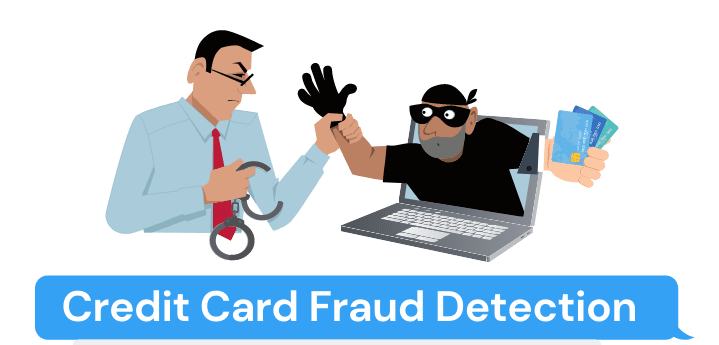

<center>Image source: Dataaspirant</center>

### >>Why did the credit card thief get arrested at the library?

### He was "checking out" more than just books!<<

#### Enough said. Let's get started!!!

___

## Dataset Description

The dataset for this competition (both train and test) was generated from a deep learning model trained on the Credit Card Fraud Detection. 

### Column Descriptions : 

- __Id__ - A unique Id for each row.


- __Time__ - Number of seconds elapsed between this transaction and the first transaction in the dataset


- __V1-V28__ - Features with dimensionality reduction to protect user identities and sensitive features(v1-v28)


- __Amount__ - Transaction amount


- __Class__ - Target Class (1 for fraudulent transactions, 0 otherwise)

## Importing libraries

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import scikitplot as skplt

import lightgbm as lgbm
from lightgbm import *


from sklearn.model_selection import train_test_split,StratifiedKFold,cross_val_score
from sklearn.metrics import *
from sklearn.preprocessing import *

import optuna
from optuna import *

In [3]:
pd.options.display.max_columns = 40

In [4]:
!pip install plot-metric
import plot_metric

In [5]:
random_ = 2023

## Importing datasets :

In [6]:
data = pd.read_csv('/kaggle/input/playground-series-s3e4/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s3e4/test.csv')
sub = pd.read_csv('/kaggle/input/playground-series-s3e4/sample_submission.csv')

In [7]:
print(data.shape)
print(test.shape)
print(sub.shape)

(219129, 32)
(146087, 31)
(146087, 2)


In [8]:
data.head()

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0.0,2.074329,-0.129425,-1.137418,0.412846,-0.192638,-1.210144,0.110697,-0.263477,0.742144,0.108782,-1.070243,-0.234910,-1.099360,0.502467,0.169318,0.065688,-0.306957,-0.323800,0.103348,-0.292969,-0.334701,-0.887840,0.336701,-0.110835,-0.291459,0.207733,-0.076576,-0.059577,1.98,0
1,1,0.0,1.998827,-1.250891,-0.520969,-0.894539,-1.122528,-0.270866,-1.029289,0.050198,-0.109948,0.908773,0.836798,-0.056580,-0.120990,-0.144028,-0.039582,1.653057,-0.253599,-0.814354,0.716784,0.065717,0.054848,-0.038367,0.133518,-0.461928,-0.465491,-0.464655,-0.009413,-0.038238,84.00,0
2,2,0.0,0.091535,1.004517,-0.223445,-0.435249,0.667548,-0.988351,0.948146,-0.084789,-0.042027,-0.818383,-0.376512,-0.226546,-0.552869,-0.886466,-0.180890,0.230286,0.590579,-0.321590,-0.433959,-0.021375,-0.326725,-0.803736,0.154495,0.951233,-0.506919,0.085046,0.224458,0.087356,2.69,0
3,3,0.0,1.979649,-0.184949,-1.064206,0.120125,-0.215238,-0.648829,-0.087826,-0.035367,0.885838,-0.007527,0.637441,0.676960,-1.504823,0.554039,-0.824356,-0.527267,-0.095838,-0.312519,0.642659,-0.340089,-0.095514,-0.079792,0.167701,-0.042939,0.000799,-0.096148,-0.057780,-0.073839,1.00,0
4,4,0.0,1.025898,-0.171827,1.203717,1.243900,-0.636572,1.099074,-0.938651,0.569239,0.692665,-0.097495,1.338869,1.391399,-0.128167,-0.081836,0.100548,-0.338937,0.090864,-0.423645,-0.731939,-0.203628,0.099157,0.608908,0.027901,-0.262813,0.257834,-0.252829,0.108338,0.021051,1.00,0


In [9]:
test.head()

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,219129,120580.0,2.115519,-0.691809,-1.305514,-0.685655,-0.641265,-0.764784,-0.924262,-0.023030,-0.230126,0.220610,1.058325,-0.723363,-0.619241,-2.243711,-0.271429,2.007845,1.213534,0.282344,0.579121,0.067367,0.241708,0.682524,0.037769,-0.546859,-0.123055,-0.084889,0.004720,-0.021944,29.95
1,219130,120580.0,1.743525,-1.681429,-0.547387,-1.061113,-0.695825,2.458824,-1.632859,1.073529,1.068183,0.483337,0.274519,-0.346514,-0.409519,-0.564673,-0.143855,1.334855,0.160901,-0.087356,-0.066264,0.441788,0.543278,1.294571,0.309541,3.703925,-0.242579,0.068708,0.002629,0.064690,163.50
2,219131,120580.0,2.205568,-1.571445,-0.238965,-1.662517,-1.652324,-0.054701,-1.682064,0.105613,-1.177858,1.626352,0.601148,-0.041610,0.432748,-0.527684,-0.543665,0.043896,0.058472,0.622667,0.010671,-0.366906,-0.131527,0.086623,0.291375,0.739087,-0.543006,-0.297813,0.043699,-0.037855,16.00
3,219132,120580.0,1.989728,-0.972909,-1.938259,-1.440129,-0.166855,-0.794048,0.252889,-0.399789,2.079398,-1.225592,-0.869368,1.647638,1.138026,-0.258468,-0.361765,-1.253326,0.099479,-0.587702,1.207085,-0.049136,-0.080115,-0.010732,-0.038550,0.656830,0.343470,-0.627529,-0.024338,-0.036143,120.98
4,219133,120580.0,-1.943548,-1.668761,0.363601,-0.977610,2.684779,-2.037681,0.039709,-0.048895,-0.281749,-0.341879,0.471628,0.637604,-0.592416,0.331702,-1.451799,0.096467,-0.853439,-0.462060,-0.267098,0.391627,0.083389,-0.306918,0.247822,-0.391799,-0.790716,-0.025706,0.330758,0.335537,1.98


### Checking null values :

In [10]:
data.isnull().sum().sum()

0

##### No null value present 

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,219129.0,109564.000000,63257.237906,0.000000,54782.000000,109564.000000,164346.000000,219128.000000
Time,219129.0,62377.415376,25620.348569,0.000000,47933.000000,63189.000000,77519.000000,120580.000000
V1,219129.0,0.096008,1.395425,-29.807725,-0.846135,0.385913,1.190661,2.430494
V2,219129.0,0.048345,1.159805,-44.247914,-0.573728,0.046937,0.814145,16.068473
V3,219129.0,0.592102,1.132884,-19.722872,-0.027154,0.735895,1.306110,6.145578
V4,219129.0,0.069273,1.253125,-5.263650,-0.769256,0.064856,0.919353,12.547997
V5,219129.0,-0.161555,1.069530,-37.591259,-0.847346,-0.229929,0.356856,34.581260
V6,219129.0,0.133688,1.202411,-25.659750,-0.631835,-0.087778,0.482388,16.233967
V7,219129.0,-0.128224,0.817207,-31.179799,-0.646730,-0.098970,0.385567,39.824099
V8,219129.0,0.149534,0.716212,-28.903442,-0.095948,0.111219,0.390976,18.270586


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219129 entries, 0 to 219128
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      219129 non-null  int64  
 1   Time    219129 non-null  float64
 2   V1      219129 non-null  float64
 3   V2      219129 non-null  float64
 4   V3      219129 non-null  float64
 5   V4      219129 non-null  float64
 6   V5      219129 non-null  float64
 7   V6      219129 non-null  float64
 8   V7      219129 non-null  float64
 9   V8      219129 non-null  float64
 10  V9      219129 non-null  float64
 11  V10     219129 non-null  float64
 12  V11     219129 non-null  float64
 13  V12     219129 non-null  float64
 14  V13     219129 non-null  float64
 15  V14     219129 non-null  float64
 16  V15     219129 non-null  float64
 17  V16     219129 non-null  float64
 18  V17     219129 non-null  float64
 19  V18     219129 non-null  float64
 20  V19     219129 non-null  float64
 21  V20     21

#### No categorical columns are present in the dataset.

### Dropping id column in both train and test data 

In [13]:
data.drop(columns='id',inplace=True)
test.drop(columns='id',inplace=True)

## Target variable : Is it imbalanced?

In [14]:
data['Class'].value_counts(normalize=True)

0    0.99786
1    0.00214
Name: Class, dtype: float64

- Label '0' $\longrightarrow$ Normal transaction

- Label '1' $\longrightarrow$ Fraud transaction

___The target column is highly imbalanced!!___

## Summary of data

- There are no "Null" values, so we don't have to work on ways to replace values.


- The transaction amount is relatively small. Average of Amount column is about 66 Dollars.

- Most of the transactions were Non-Fraud (99.78%) of the time, while Fraud transactions occurs (0.214%) of the time in the dataframe.

## Imbalanced date

### Issues with imbalanced dataset:

An imbalanced dataset can have a significant impact on the accuracy of a model. When a dataset is imbalanced, the majority class dominates, and the minority class is under-represented. This can cause a model to be biased towards the majority class and not perform well on the minority class.

### Here are a few ways that an imbalanced dataset can affect the accuracy of a model:


- High accuracy but low recall: In an imbalanced dataset, a model may achieve high accuracy by simply predicting the majority class for all examples, resulting in low recall for the minority class.


- Overfitting: An imbalanced dataset can lead to overfitting, where a model performs well on the training data but not on new unseen data.


- Poor generalization: A model trained on an imbalanced dataset may not generalize well to new unseen data, leading to poor performance on unseen examples from the minority class.


- High bias: An imbalanced dataset can lead to high bias in a model, where the model is not able to learn the underlying patterns in the data and is not able to make accurate predictions.

### Ways to handle Imbalanced Dataset:


- Over-sampling the minority class: This involves duplicating examples from the minority class to balance the class distribution.


- Under-sampling the majority class: This involves removing examples from the majority class to balance the class distribution.


- Synthetic data generation: This involves generating new examples for the minority class using techniques such as SMOTE (Synthetic Minority Over-sampling Technique).


- Changing the decision threshold: This involves adjusting the threshold at which a prediction is considered positive, which can increase the sensitivity of the model to the minority class.

## EDA

In [15]:
sns.set_palette('Set2')

array([[<AxesSubplot:title={'center':'Time'}>,
        <AxesSubplot:title={'center':'V1'}>,
        <AxesSubplot:title={'center':'V2'}>,
        <AxesSubplot:title={'center':'V3'}>,
        <AxesSubplot:title={'center':'V4'}>,
        <AxesSubplot:title={'center':'V5'}>],
       [<AxesSubplot:title={'center':'V6'}>,
        <AxesSubplot:title={'center':'V7'}>,
        <AxesSubplot:title={'center':'V8'}>,
        <AxesSubplot:title={'center':'V9'}>,
        <AxesSubplot:title={'center':'V10'}>,
        <AxesSubplot:title={'center':'V11'}>],
       [<AxesSubplot:title={'center':'V12'}>,
        <AxesSubplot:title={'center':'V13'}>,
        <AxesSubplot:title={'center':'V14'}>,
        <AxesSubplot:title={'center':'V15'}>,
        <AxesSubplot:title={'center':'V16'}>,
        <AxesSubplot:title={'center':'V17'}>],
       [<AxesSubplot:title={'center':'V18'}>,
        <AxesSubplot:title={'center':'V19'}>,
        <AxesSubplot:title={'center':'V20'}>,
        <AxesSubplot:title={'center':'V

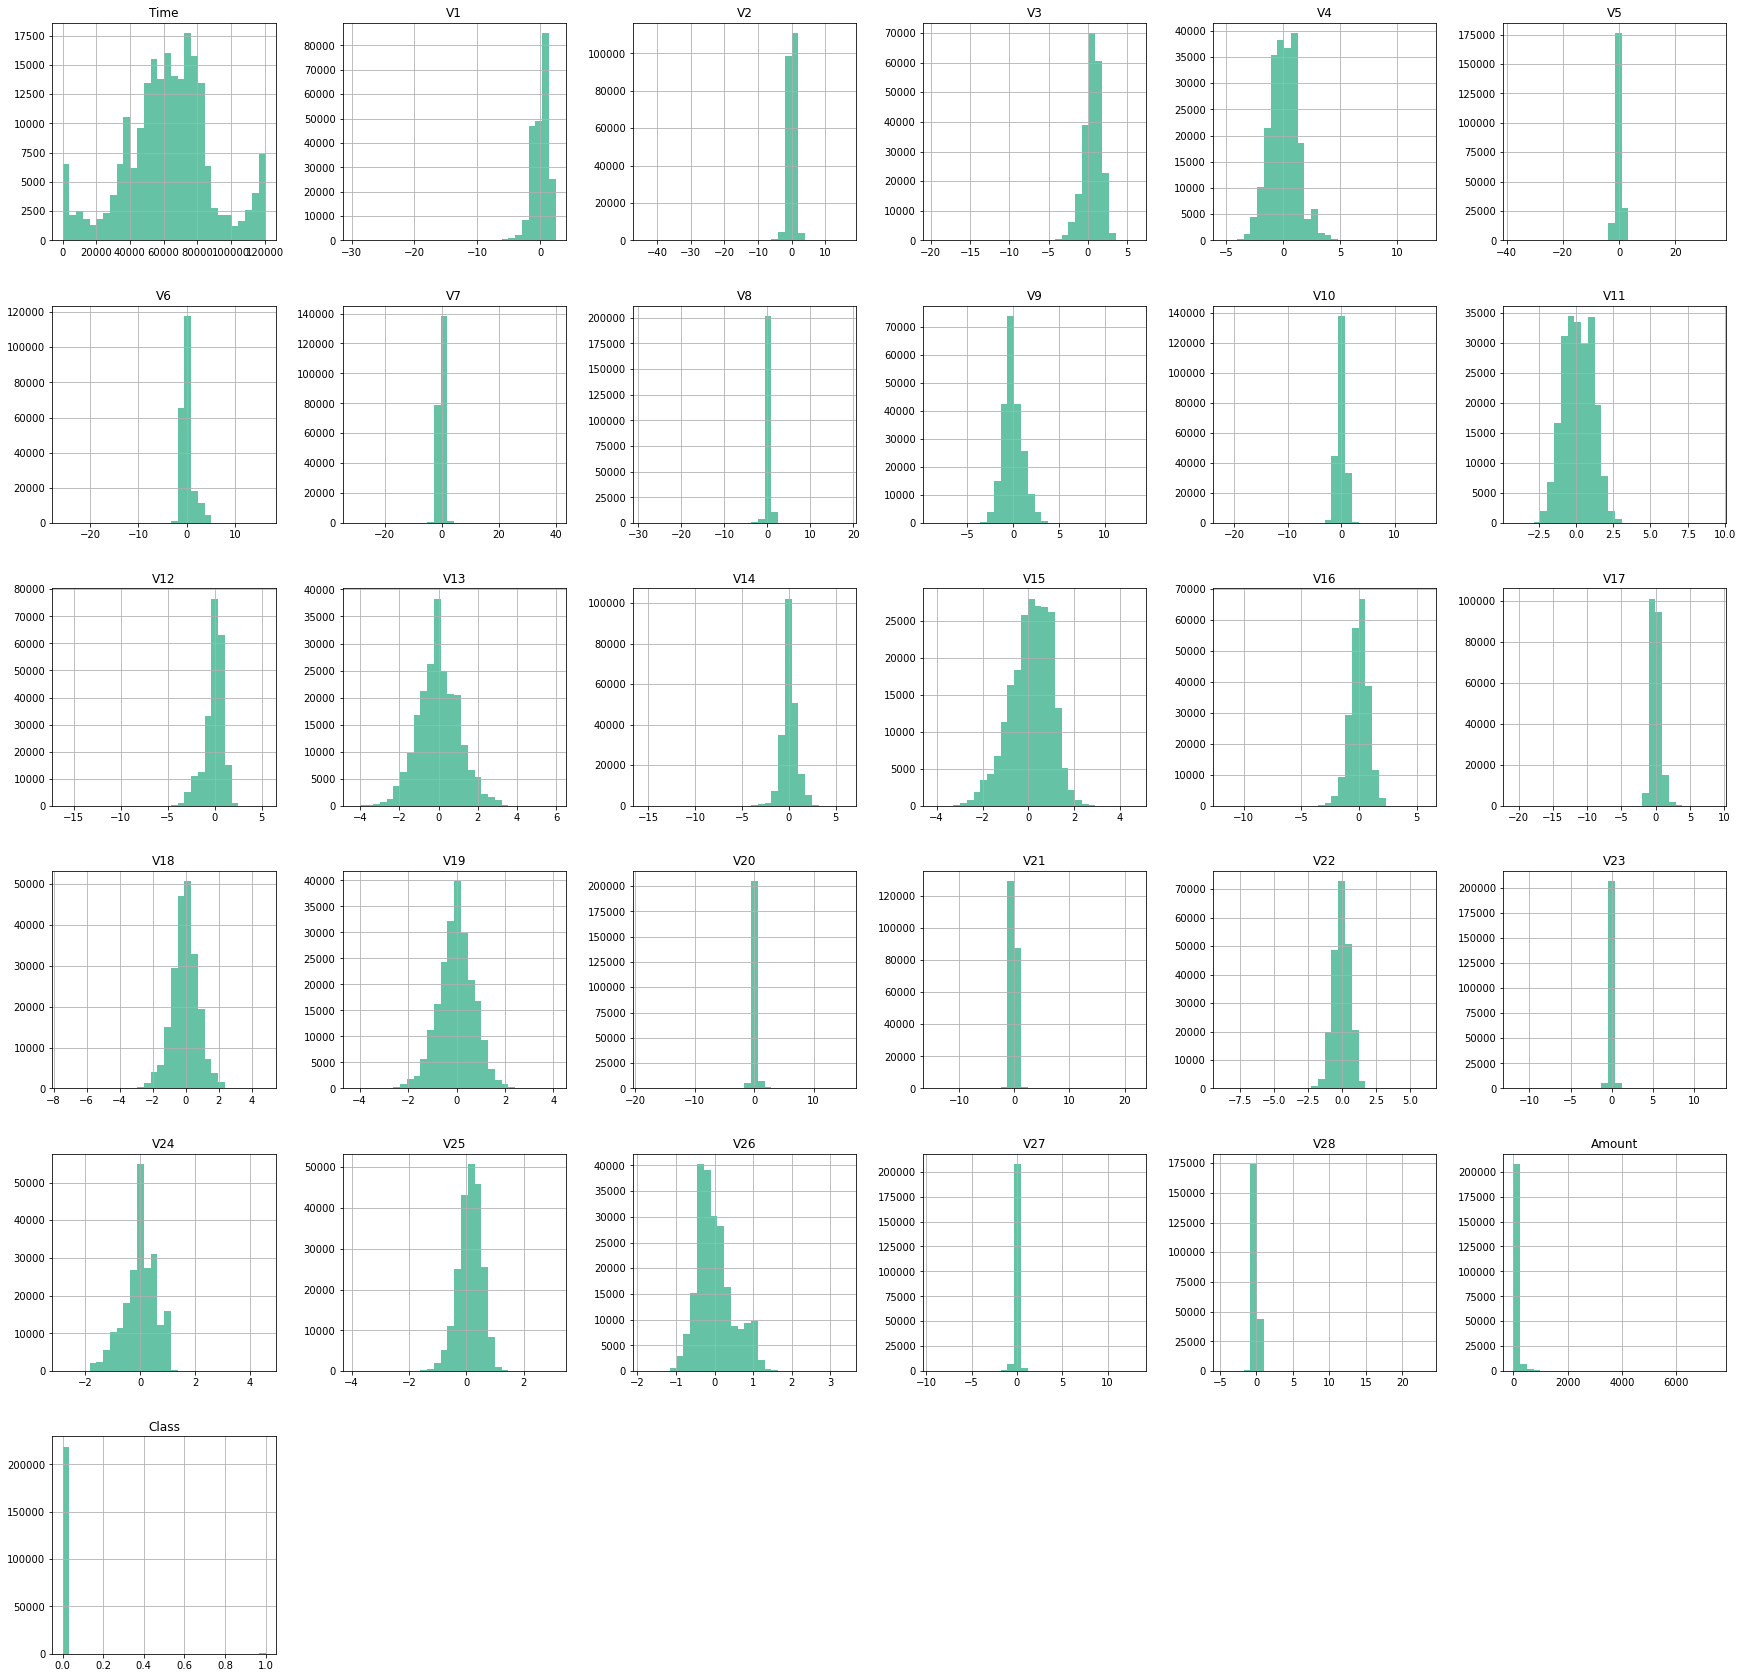

In [16]:
data.hist(bins=30,figsize=(30,30))

### Target column

In [17]:
data['Class'].value_counts()

0    218660
1       469
Name: Class, dtype: int64

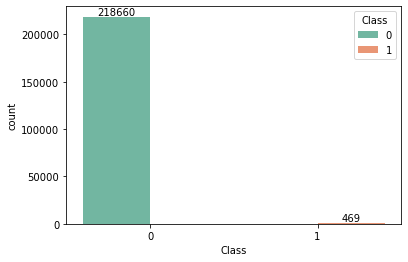

In [18]:
ax = sns.countplot(data=data,x=data['Class'],hue=data['Class'])
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

## Separating the data for analysis :

In [19]:
legit = data[data['Class']==0]
fraud = data[data['Class']==1]

print('total no. of legit transactions are :' ,legit.shape)
print('total no. of fraudulent transactions are :' ,fraud.shape)

total no. of legit transactions are : (218660, 31)
total no. of fraudulent transactions are : (469, 31)


### Amount of legit and fraudulent transactions : 

In [20]:
legit['Amount'].describe().T

count    218660.000000
mean         66.269651
std         149.935158
min           0.000000
25%           5.990000
50%          21.900000
75%          68.970000
max        7475.000000
Name: Amount, dtype: float64

In [21]:
fraud['Amount'].describe().T

count     469.000000
mean      108.391002
std       376.603036
min         0.000000
25%         1.000000
50%         8.760000
75%        39.950000
max      4471.960000
Name: Amount, dtype: float64

#### We can see that mean amount of fraudulent transactions are more than legit transactions.

#### Comparing values of both type of transactions :

In [22]:
data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,62369.241279,0.098545,0.047676,0.594936,0.067650,-0.162057,0.133923,-0.127294,0.150787,-0.049075,-0.039134,0.152886,-0.060095,0.014136,0.069074,0.108414,0.013845,0.036398,-0.034692,-0.007979,0.009338,-0.031200,-0.050896,-0.050369,-0.002846,0.124017,0.010218,0.014067,0.017167,66.269651
1,66188.392324,-1.086640,0.360162,-0.729018,0.826276,0.072711,0.024195,-0.562112,-0.434633,0.295541,-0.330673,0.501366,-0.500703,0.104337,-0.596737,0.215408,-0.077345,0.231121,0.322761,-0.158610,0.181932,0.032385,-0.030467,-0.125792,-0.071228,0.118310,-0.147291,-0.001152,0.085422,108.391002


## Applying Under-Sampling

___Note : Number of fraudulent transactions are 469. So for a balanced model we need same amount of Legit transactions.___

In [23]:
legit_sample = legit.sample(n=469,random_state=random_)
legit_sample

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
110940,63528.0,-1.336079,0.381829,1.484549,0.664287,0.285557,0.534336,0.078796,0.564230,-0.876334,-0.222845,0.458088,-0.385815,-1.384937,0.957472,1.251702,-0.072817,-0.057738,0.304877,0.961564,0.231637,-0.085966,-0.687829,0.207438,-0.769264,0.106730,-0.489827,0.083328,0.010528,68.90,0
122328,66816.0,0.602708,-1.813304,0.316929,0.020233,-1.655029,-0.532781,-0.173910,-0.242964,-0.128766,0.444739,-0.049442,0.742114,0.291526,-0.156400,0.367923,-2.267715,0.817121,0.185530,-1.310898,0.198563,-0.186295,-0.619736,-0.213934,0.527777,0.019817,1.105937,-0.091135,0.068184,365.40,0
215370,118845.0,1.989627,0.065707,-1.878173,0.078742,0.750700,-0.466597,0.194878,-0.185716,0.204736,-0.451636,1.295848,1.165869,0.973753,-0.683539,0.210611,0.494410,0.181606,1.012747,-0.016788,-0.068182,0.218647,0.766806,-0.067990,0.191679,0.296825,-0.120917,-0.004934,-0.034011,30.89,0
22924,33268.0,1.370755,-0.037775,0.013535,-0.256749,-0.106544,-0.611438,-0.020910,-0.215829,0.234564,-0.198497,-0.848597,0.410503,1.271807,-0.066797,1.169990,0.637241,-0.716453,-0.358203,0.420416,0.029773,-0.235814,-0.611337,-0.038583,-0.402950,0.313360,0.847655,-0.083555,-0.003536,4.00,0
97408,59925.0,1.144850,-1.651289,0.914695,-1.407802,-1.964549,-0.041715,-1.332230,0.075017,-1.936373,1.438583,1.694924,0.155944,1.177537,-0.584798,0.366865,-0.415571,0.573858,0.268967,-0.646588,0.037364,0.208023,0.724484,-0.124464,0.292517,0.176567,-0.085909,0.051249,0.038496,160.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64796,51359.0,1.317730,-0.103028,0.140069,-0.395935,0.334901,0.969375,-0.607291,0.266823,0.259550,-0.054917,0.182409,0.937153,1.477977,-0.144667,0.814453,1.085728,-1.300764,0.504544,0.484545,0.040916,-0.129885,-0.298491,-0.118167,-1.644540,0.262979,0.985454,-0.028806,-0.011189,0.12,0
6180,3760.0,-0.817161,-0.238087,2.141799,-1.638574,-0.292678,-0.927653,-0.291546,-0.042580,0.234833,-0.540118,0.258971,-3.361613,1.482967,1.177966,-0.487933,1.547104,0.547653,-0.945489,-0.520099,0.099241,0.037151,0.008601,-0.076059,0.311680,-0.065160,-0.478292,-0.003916,0.090181,30.00,0
190673,84899.0,-0.567020,0.358905,2.443836,0.120829,-0.191316,0.489833,0.064678,0.077344,0.646966,-0.476727,-1.465846,-0.201240,-0.653025,-0.827492,-0.859697,-0.486889,-0.154534,-0.152517,0.663869,-0.016565,-0.061215,0.252640,-0.025960,-0.089900,-0.358848,0.272511,-0.072500,-0.079516,0.01,0
176957,80770.0,1.057467,0.530553,-0.139916,1.321527,-0.005371,-0.791206,0.177533,-0.044472,-0.359180,-0.505098,2.130580,0.781736,-0.071577,-0.945143,0.454412,0.394836,0.844651,0.567788,-0.637383,-0.147725,0.022040,0.053739,-0.077193,0.406424,0.520430,-0.335548,0.044447,0.050008,39.00,0


### Concatenating both datasets 

In [24]:
new_data = pd.concat([legit_sample,fraud],axis=0)
new_data.reset_index(inplace=True,drop=True)
new_data.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
343,33309.0,-0.565899,0.890937,1.452314,0.005908,0.570045,-0.173765,0.774423,-0.073737,0.058166,0.015538,1.777576,-0.306798,-1.863235,-0.161381,0.581906,-0.038683,0.453812,0.073679,-0.142695,0.204049,-0.252814,-0.453823,0.046824,-0.132912,-0.594833,0.102513,0.146518,-0.251299,1.98,0
903,109835.0,2.068687,-0.066250,-0.584413,0.315465,-0.143716,-0.293390,-0.474502,-0.196524,2.482589,-0.583940,-0.553514,-1.926453,2.637245,1.346569,0.276658,0.458940,-0.594557,0.659817,-0.270748,-0.184411,0.082445,0.707098,0.038556,-0.865699,0.099161,-0.605557,0.038772,-0.025605,1.00,1
160,29373.0,1.469088,-0.373077,-0.070017,-0.711498,-0.543186,-0.474789,-0.381249,-0.180863,-1.049608,0.637780,-1.062180,-0.446460,0.749794,-0.292775,-0.182930,0.733833,0.356549,-1.572688,0.967517,0.080758,0.088816,0.360757,-0.217525,-0.402848,0.780039,-0.038254,0.001756,0.002829,10.00,0
473,1438.0,-0.738582,0.654464,0.652465,-0.139933,1.183689,-0.037131,0.638169,0.136502,-0.357541,-0.238928,1.039441,0.302428,-1.116929,0.651270,-0.295048,-0.421716,-0.456629,-0.037795,-0.826278,-0.314816,0.167918,0.563421,0.012614,-0.311213,0.105798,-0.252849,0.049231,0.108966,4.99,1
0,63528.0,-1.336079,0.381829,1.484549,0.664287,0.285557,0.534336,0.078796,0.564230,-0.876334,-0.222845,0.458088,-0.385815,-1.384937,0.957472,1.251702,-0.072817,-0.057738,0.304877,0.961564,0.231637,-0.085966,-0.687829,0.207438,-0.769264,0.106730,-0.489827,0.083328,0.010528,68.90,0


In [25]:
new_data['Class'].value_counts()

0    469
1    469
Name: Class, dtype: int64

In [26]:
new_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,65254.579957,0.141035,0.015554,0.434995,0.043007,-0.175932,0.199964,-0.171929,0.164275,-0.034966,-0.000694,0.103046,-0.093719,-0.009117,0.004697,0.087284,-0.009541,0.051041,-0.019354,-0.005873,0.040956,-0.070513,-0.084486,-0.062436,-0.025402,0.134818,0.033273,0.006870,0.009321,77.551194
1,66188.392324,-1.086640,0.360162,-0.729018,0.826276,0.072711,0.024195,-0.562112,-0.434633,0.295541,-0.330673,0.501366,-0.500703,0.104337,-0.596737,0.215408,-0.077345,0.231121,0.322761,-0.158610,0.181932,0.032385,-0.030467,-0.125792,-0.071228,0.118310,-0.147291,-0.001152,0.085422,108.391002


#### Now it looks quiet balanced

### Splitting into target and features columns

In [27]:
X = new_data.drop(columns='Class')
y = new_data['Class']

X.shape, y.shape

((938, 30), (938,))

In [28]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,63528.0,-1.336079,0.381829,1.484549,0.664287,0.285557,0.534336,0.078796,0.564230,-0.876334,-0.222845,0.458088,-0.385815,-1.384937,0.957472,1.251702,-0.072817,-0.057738,0.304877,0.961564,0.231637,-0.085966,-0.687829,0.207438,-0.769264,0.106730,-0.489827,0.083328,0.010528,68.90
1,66816.0,0.602708,-1.813304,0.316929,0.020233,-1.655029,-0.532781,-0.173910,-0.242964,-0.128766,0.444739,-0.049442,0.742114,0.291526,-0.156400,0.367923,-2.267715,0.817121,0.185530,-1.310898,0.198563,-0.186295,-0.619736,-0.213934,0.527777,0.019817,1.105937,-0.091135,0.068184,365.40
2,118845.0,1.989627,0.065707,-1.878173,0.078742,0.750700,-0.466597,0.194878,-0.185716,0.204736,-0.451636,1.295848,1.165869,0.973753,-0.683539,0.210611,0.494410,0.181606,1.012747,-0.016788,-0.068182,0.218647,0.766806,-0.067990,0.191679,0.296825,-0.120917,-0.004934,-0.034011,30.89
3,33268.0,1.370755,-0.037775,0.013535,-0.256749,-0.106544,-0.611438,-0.020910,-0.215829,0.234564,-0.198497,-0.848597,0.410503,1.271807,-0.066797,1.169990,0.637241,-0.716453,-0.358203,0.420416,0.029773,-0.235814,-0.611337,-0.038583,-0.402950,0.313360,0.847655,-0.083555,-0.003536,4.00
4,59925.0,1.144850,-1.651289,0.914695,-1.407802,-1.964549,-0.041715,-1.332230,0.075017,-1.936373,1.438583,1.694924,0.155944,1.177537,-0.584798,0.366865,-0.415571,0.573858,0.268967,-0.646588,0.037364,0.208023,0.724484,-0.124464,0.292517,0.176567,-0.085909,0.051249,0.038496,160.10


In [29]:
y

0      0
1      0
2      0
3      0
4      0
      ..
933    1
934    1
935    1
936    1
937    1
Name: Class, Length: 938, dtype: int64

In [30]:
all_features = X.columns
all_features

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

## Modelling

###  Vanilla Lightgbm classifier using Stratified K-Fold

In [31]:
skf = StratifiedKFold(n_splits=3,shuffle=True,random_state=random_)

In [32]:
lgb = LGBMClassifier(random_state=random_,)
from plot_metric.functions import BinaryClassification

Testing Score on fold 1: 0.7670259676629104
Training Score on fold 1: 1.0
                   ________________________
                  |  Classification Report |
                   ‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
              precision    recall  f1-score   support

     Class 0       0.64      0.78      0.70       157
     Class 1       0.71      0.55      0.62       156

    accuracy                           0.66       313
   macro avg       0.67      0.66      0.66       313
weighted avg       0.67      0.66      0.66       313




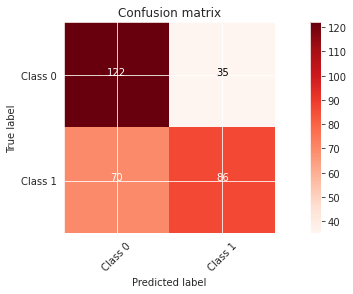

________________________________________________________________________________


Testing Score on fold 2: 0.8150824759105013
Training Score on fold 2: 1.0
                   ________________________
                  |  Classification Report |
                   ‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
              precision    recall  f1-score   support

     Class 0       0.72      0.76      0.74       156
     Class 1       0.75      0.70      0.72       157

    accuracy                           0.73       313
   macro avg       0.73      0.73      0.73       313
weighted avg       0.73      0.73      0.73       313




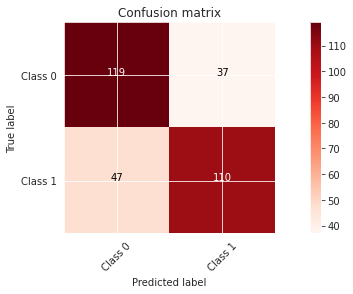

________________________________________________________________________________


Testing Score on fold 3: 0.7656558185404339
Training Score on fold 3: 1.0
                   ________________________
                  |  Classification Report |
                   ‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
              precision    recall  f1-score   support

     Class 0       0.69      0.69      0.69       156
     Class 1       0.69      0.69      0.69       156

    accuracy                           0.69       312
   macro avg       0.69      0.69      0.69       312
weighted avg       0.69      0.69      0.69       312




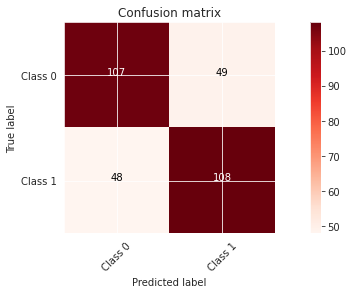

________________________________________________________________________________




Mean score across all folds: 0.7825880873712818
Mean training score across all folds: 1.0


In [33]:
training_score = []
testing_score = []

for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    
    X_train, X_test = X[all_features].loc[train_index], X[all_features].loc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    
    lgb.fit(X_train, y_train ,eval_metric='AUC')
    
    y_pred = lgb.predict_proba(X_test)[:,1]
    y_pred_train = lgb.predict_proba(X_train)[:,1]
    
    test_score = roc_auc_score(y_test,y_pred)
    train_score = roc_auc_score(y_train,y_pred_train)
    
    testing_score.append(test_score)
    training_score.append(train_score)
    print(f'Testing Score on fold {i+1}: {test_score}')
    print(f'Training Score on fold {i+1}: {train_score}')
    
    
    bc = BinaryClassification(y_test, y_pred, labels=["Class 0", "Class 1"])
    
    

    # Figures
    bc.print_report()
   
    print()
    
    
    bc = BinaryClassification(y_test, y_pred, labels=["Class 0", "Class 1"])

    # Figures
    plt.figure(figsize=(10,4))
    bc.plot_confusion_matrix()
    plt.show()
    
    print('__'*40)
    print('\n')
    
print("\n")
print(f'Mean score across all folds: {np.mean(testing_score)}')
print(f'Mean training score across all folds: {np.mean(training_score)}')

#### Model is overfitting

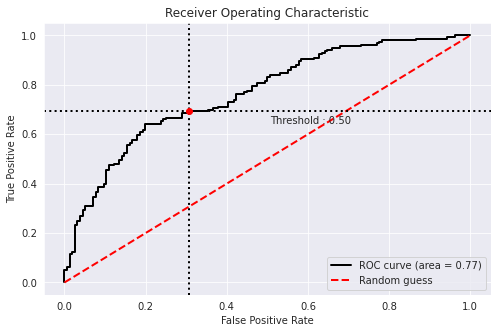

In [34]:
# Visualisation with plot_metric

bc = BinaryClassification(y_test, y_pred, labels=["Class 0", "Class 1"])

# Figures
plt.figure(figsize=(8,5))
bc.plot_roc_curve()
plt.show()

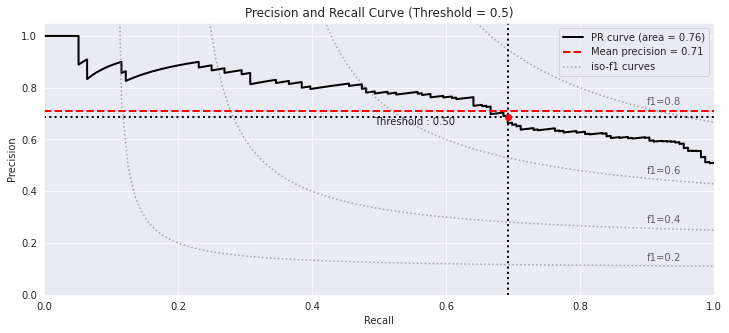

In [35]:
bc = BinaryClassification(y_test, y_pred, labels=["Class 0", "Class 1"])

# Figures
plt.figure(figsize=(12,5))
bc.plot_precision_recall_curve()
plt.show()

## Scaling the data

Scaling Amount and Time column. These should be scaled as the other columns. 

In [36]:
X[['Time','Amount']]

,Time,Amount
0,63528.0,68.90
1,66816.0,365.40
2,118845.0,30.89
3,33268.0,4.00
4,59925.0,160.10
...,...,...
933,120164.0,6.99
934,120185.0,498.25
935,120188.0,229.99
936,120550.0,20.00


In [37]:
ss = StandardScaler()

In [38]:
X_trf = ss.fit_transform(X,y)
X_trf = pd.DataFrame(X_trf,columns=X.columns)
X_trf.tail(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
935,2.054501,0.842643,-0.375890,-0.612672,-0.371835,-0.217114,-0.307463,0.156785,-0.053828,-0.138511,0.393543,-1.523708,0.245608,0.046901,0.201246,-0.662317,-1.878121,-0.043404,0.921359,0.237336,-0.294491,-0.086794,0.167358,0.018717,0.092866,-0.135634,-0.850774,0.084382,-0.054732,0.456600
936,2.068155,-0.331090,0.543965,0.091035,2.241706,0.348302,0.749006,0.018545,0.641921,-1.315363,1.083303,-2.052928,-0.416869,-0.251765,0.617287,0.471383,0.349286,0.059000,-0.076660,1.472763,0.052154,-0.390303,-1.664207,0.461815,-0.547865,-1.972890,0.286361,0.317054,-0.167651,-0.243168
937,2.069023,-0.119703,0.579402,-0.582910,-0.496322,0.499026,-1.124223,0.785849,-0.028654,0.103234,-0.734905,-0.306634,-0.598592,-0.998587,-1.911587,0.716061,1.003234,1.072998,1.895134,-0.896209,0.103001,0.229593,1.197473,-0.305031,-0.404718,-0.342474,-0.180639,0.893562,0.291663,-0.306483


In [39]:
y

0      0
1      0
2      0
3      0
4      0
      ..
933    1
934    1
935    1
936    1
937    1
Name: Class, Length: 938, dtype: int64

In [40]:
all_features = X_trf.columns
all_features

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

## Stratified K-Fold on scaled data

In [41]:
training_score = []
testing_score = []

for i, (train_index, test_index) in enumerate(skf.split(X_trf, y)):
    
    X_train, X_test = X_trf[all_features].loc[train_index], X_trf[all_features].loc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    
    lgb.fit(X_train, y_train ,eval_metric='AUC')
    
    y_pred = lgb.predict_proba(X_test)[:,1]
    y_pred_train = lgb.predict_proba(X_train)[:,1]
    
    test_score = roc_auc_score(y_test,y_pred)
    train_score = roc_auc_score(y_train,y_pred_train)
    
    testing_score.append(test_score)
    training_score.append(train_score)
    print(f'Testing Score on fold {i+1}: {test_score}')
    print(f'Training Score on fold {i+1}: {train_score}')
    print('\n')
    
    
    
    
print("\n")
print(f'Mean score across all folds: {np.mean(testing_score)}')
print(f'Mean training score across all folds: {np.mean(training_score)}')

Testing Score on fold 1: 0.7706189776253469
Training Score on fold 1: 1.0


Testing Score on fold 2: 0.8148374979585171
Training Score on fold 2: 1.0


Testing Score on fold 3: 0.7508629191321499
Training Score on fold 3: 1.0




Mean score across all folds: 0.7787731315720047
Mean training score across all folds: 1.0


#### Conclusion : Even after scaling there is no difference

#### Plotting the score


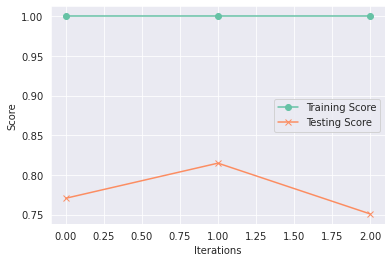

In [42]:
plt.plot(training_score, label='Training Score',marker ='o')
plt.plot(testing_score, label='Testing Score',marker='x')
plt.xlabel('Iterations')
plt.ylabel('Score')
plt.legend()
plt.show()

## OPTUNA : 

Optuna is used to find the best set of hyperparameters for a machine learning model. Hyperparameter optimization is the process of finding the optimal values for the hyperparameters of a model that give the best performance on a given dataset.

Optuna uses various optimization algorithms such as Random Search, TPE (Tree-structured Parzen Estimator) and CMA-ES (Covariance Matrix Adaptation Evolution Strategy) etc. to find the optimal hyperparameters.

It also supports parallel execution and pruning of unpromising trials to speed up the optimization process.

In [43]:
X_trf.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.082739,-0.333425,0.061180,0.722192,0.140508,0.193427,0.270490,0.238242,0.389744,-0.703565,-0.033736,0.127550,-0.055790,-1.315390,0.726458,1.164055,-0.024411,-0.111034,0.153180,1.205170,0.104506,-0.072310,-0.890155,0.364510,-1.151820,-0.039202,-0.899993,0.144381,-0.044134,-0.080214
1,0.041286,0.415396,-0.631183,0.205358,-0.253554,-0.919851,-0.413085,0.103198,-0.060064,-0.181062,0.360256,-0.287736,0.654415,0.223968,0.080916,0.229115,-1.848445,0.377547,0.033828,-1.418598,0.075748,-0.180750,-0.793997,-0.144835,0.920390,-0.210981,2.418207,-0.168647,0.024930,0.907838
2,2.003842,0.951068,-0.038528,-0.766279,-0.217756,0.460270,-0.370689,0.300276,-0.028162,0.052035,-0.168762,0.813048,0.921235,0.850401,-0.224586,0.062696,0.446974,0.022632,0.861075,0.075571,-0.156182,0.256927,1.164014,0.031578,0.383426,0.336514,-0.132889,-0.013982,-0.097484,-0.206878
3,-1.224160,0.712040,-0.071167,0.071064,-0.423024,-0.031515,-0.463471,0.184960,-0.044943,0.072883,-0.019366,-0.941644,0.445615,1.124079,0.132846,1.077613,0.565671,-0.478906,-0.509925,0.580364,-0.071011,-0.234272,-0.782136,0.067125,-0.566581,0.369194,1.881139,-0.155047,-0.060980,-0.296486
4,-0.218646,0.624789,-0.580082,0.469953,-1.127291,-1.097417,-0.098518,-0.515803,0.117131,-1.444466,0.946798,1.139592,0.285331,1.037518,-0.167361,0.227996,-0.309251,0.241693,0.117268,-0.651591,-0.064412,0.245444,1.104249,-0.036687,0.544528,0.098829,-0.060094,0.086824,-0.010631,0.223699


In [44]:
y.value_counts()

0    469
1    469
Name: Class, dtype: int64

In [45]:
def objective(trial):
    
    
    params = {
        'boosting_type': trial.suggest_categorical('boosting_type', ['gbdt', 'dart', 'goss']),
        'num_leaves': trial.suggest_int('num_leaves', 2, 20),
        "max_depth": trial.suggest_int("max_depth", 3, 5),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.5,log=True),
        'scale_pos_weight': trial.suggest_int('scale_pos_weight',2,10),
        #'feature_fraction': trial.suggest_float('feature_fraction', 0.4, 0.9),
        'colsample_bytree' :trial.suggest_float('colsample_bytree',0.5,0.8,step=0.1),
        #'bagging_fraction': trial.suggest_float('bagging_fraction', 0.4, 0.9),
        'min_child_samples': trial.suggest_int('min_child_samples', 1,10),
        'reg_alpha' : trial.suggest_int('reg_alpha',1,6),
        'reg_lambda' : trial.suggest_int('reg_lambda',1,4),
        'n_jobs' : -1
    }


    # Create the KFold object
    skf = StratifiedKFold(n_splits=10,shuffle=True,random_state=random_)

    # Initialize the LightGBM classifier
    lgb = LGBMClassifier(objective='binary', n_jobs=-1, random_state=random_)

    # Initialize the list to store the cross-validation scores
    cv_scores = []

    # Iterate through the folds
    for i, (train_index, test_index) in enumerate (skf.split(X_trf, y)):
        X_train, X_test = X_trf[all_features].loc[train_index], X_trf[all_features].loc[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Fit the classifier on the training data
        lgb.set_params(**params)
        lgb.fit(X_train, y_train, eval_set=[(X_test, y_test)], callbacks=[early_stopping(100)],verbose=False)

        # Predict the labels of the test set
        y_pred = lgb.predict_proba(X_test)[:,1]

        # Compute the AUC score
        score = roc_auc_score(y_test, y_pred)
        cv_scores.append(score)

    # Compute the mean and standard deviation of the cross-validation scores
    mean_score = np.mean(cv_scores)
    std_score = np.std(cv_scores)

    # Return the negative mean score (as optuna minimizes the objective function)
    return mean_score


if __name__ == "__main__":
    study = optuna.create_study(direction="maximize")

[I 2025-07-02 07:28:38,017] A new study created in memory with name: no-name-40fa9fe9-1af1-4c05-abe5-6408e8fbb662


In [46]:
#study.optimize(objective, n_trials=600,show_progress_bar=True)

## Results of Optuna

Just commenting out everything for removing the clutter and pasting the graphs of results directly

In [47]:
#print(f"Optimized accuracy: {study.best_value:.4f}")
#print("+")
#print("Best params:")
#for key, value in study.best_params.items():
    #print(f"\t{key}: {value}")

In [48]:
#from optuna.visualization.matplotlib import * 

#plot_optimization_history(study)

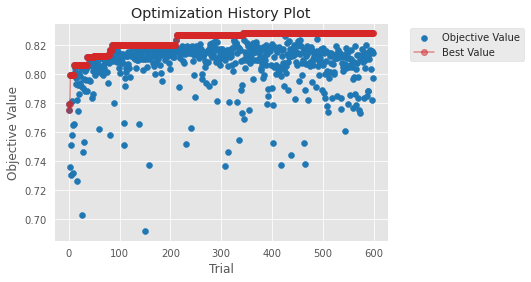

In [49]:
#plot_param_importances(study)

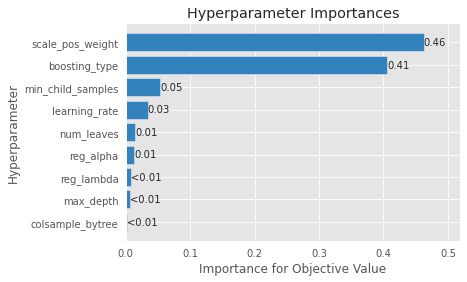

In [50]:
#optuna.visualization.plot_edf(study)

In [51]:
#optuna.visualization.plot_slice(study)

## Training lightgbm with optuna output

Best params:
	boosting_type: dart
	num_leaves: 5
	max_depth: 3
	learning_rate: 0.23989940684326325
	scale_pos_weight: 6
	colsample_bytree: 0.6
	min_child_samples: 3
	reg_alpha: 5
	reg_lambda: 2

In [52]:
params = { 
    'boosting_type': 'dart',
    'num_leaves': 5,
    'max_depth': 3,
    'learning_rate': 0.239899406843263,
    'scale_pos_weight': 6,
    'colsample_bytree': 0.6,
    'min_child_samples': 3,
    'reg_alpha': 5,
    'reg_lambda': 2,
}

In [53]:
lgb = LGBMClassifier(**params,n_jobs=-1,random_state=random_)

In [54]:
y.value_counts()

0    469
1    469
Name: Class, dtype: int64

## 

## Checking the accuracy with the new params of lightgbm

Testing Score on fold 1: 0.7765392781316347
Training Score on fold 1: 0.9484721880888015
                   ________________________
                  |  Classification Report |
                   ‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
              precision    recall  f1-score   support

     Class 0       0.79      0.29      0.43       157
     Class 1       0.56      0.92      0.70       156

    accuracy                           0.61       313
   macro avg       0.68      0.61      0.56       313
weighted avg       0.68      0.61      0.56       313




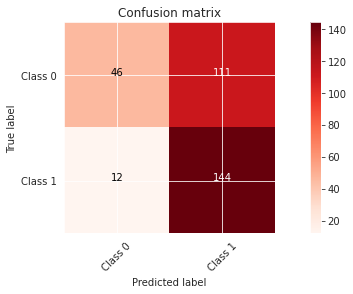

________________________________________________________________________________


Testing Score on fold 2: 0.8583210844357341
Training Score on fold 2: 0.9389489637093471
                   ________________________
                  |  Classification Report |
                   ‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
              precision    recall  f1-score   support

     Class 0       0.95      0.27      0.42       156
     Class 1       0.58      0.99      0.73       157

    accuracy                           0.63       313
   macro avg       0.77      0.63      0.57       313
weighted avg       0.76      0.63      0.57       313




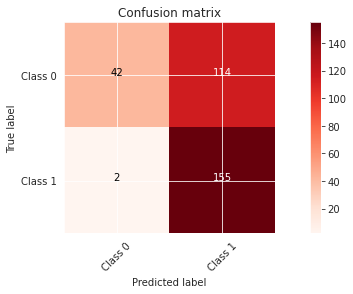

________________________________________________________________________________


Testing Score on fold 3: 0.7544378698224852
Training Score on fold 3: 0.9553838459104411
                   ________________________
                  |  Classification Report |
                   ‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
              precision    recall  f1-score   support

     Class 0       0.85      0.26      0.39       156
     Class 1       0.56      0.96      0.71       156

    accuracy                           0.61       312
   macro avg       0.71      0.61      0.55       312
weighted avg       0.71      0.61      0.55       312




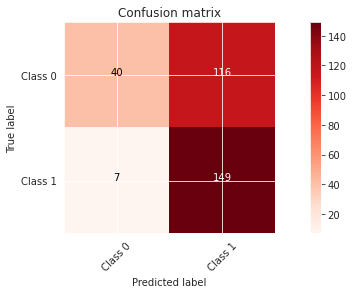

________________________________________________________________________________




Mean score across all folds: 0.7964327441299514
Mean training score across all folds: 0.9476016659028632


In [55]:
training_score = []
testing_score = []

for i, (train_index, test_index) in enumerate(skf.split(X_trf, y)):
    
    X_train, X_test = X_trf[all_features].loc[train_index], X_trf[all_features].loc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    
    lgb.fit(X_train, y_train ,eval_metric='AUC')
    
    y_pred = lgb.predict_proba(X_test)[:,1]
    y_pred_train = lgb.predict_proba(X_train)[:,1]
    
    test_score = roc_auc_score(y_test,y_pred)
    train_score = roc_auc_score(y_train,y_pred_train)
    
    testing_score.append(test_score)
    training_score.append(train_score)
    print(f'Testing Score on fold {i+1}: {test_score}')
    print(f'Training Score on fold {i+1}: {train_score}')
    
    
    bc = BinaryClassification(y_test, y_pred, labels=["Class 0", "Class 1"])
    
    

    # Figures
    bc.print_report()
   
    print()
    
    
    bc = BinaryClassification(y_test, y_pred, labels=["Class 0", "Class 1"])

    # Figures
    plt.figure(figsize=(10,4))
    bc.plot_confusion_matrix()
    plt.show()
    
    print('__'*40)
    print('\n')
    
print("\n")
print(f'Mean score across all folds: {np.mean(testing_score)}')
print(f'Mean training score across all folds: {np.mean(training_score)}')

## Increased Recall

___We see that our recall has increase from 0.70 to 0.90 now, Which is a very postive sign.___

___We don't want to classify fradulent data as normal transaction.__

Score from previous version:

- Mean score across all folds: 0.7964327441299514
- Mean training score across all folds: 0.9476016659028632
- score : 0.81247

Params were : 

Best params:
	boosting_type: dart
	num_leaves: 5
	max_depth: 3
	learning_rate: 0.23989940684326325
	scale_pos_weight: 6
	colsample_bytree: 0.6
	min_child_samples: 3
	reg_alpha: 5
	reg_lambda: 2

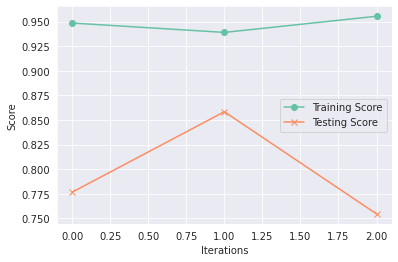

In [56]:
plt.plot(training_score, label='Training Score',marker ='o')
plt.plot(testing_score, label='Testing Score',marker='x')
plt.xlabel('Iterations')
plt.ylabel('Score')
plt.legend()
plt.show()

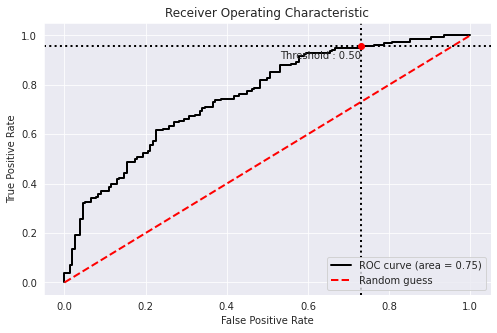

In [57]:
# Visualisation with plot_metric

bc = BinaryClassification(y_test, y_pred, labels=["Class 0", "Class 1"])

# Figures
plt.figure(figsize=(8,5))
bc.plot_roc_curve()
plt.show()

In [58]:
X_trf.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

### Scaling test data

In [59]:
test_trf = ss.transform(test)

In [60]:
test_trf

array([[ 2.06928706e+00,  9.99691927e-01, -2.77454318e-01, ...,
         3.33981570e-03, -8.30301658e-02, -2.10010471e-01],
       [ 2.06928706e+00,  8.56016088e-01, -5.89588638e-01, ...,
        -4.12298776e-04,  2.07450622e-02,  2.35029353e-01],
       [ 2.06928706e+00,  1.03447169e+00, -5.54898853e-01, ...,
         7.32765196e-02, -1.02089672e-01, -2.56497222e-01],
       ...,
       [ 4.03863331e+00, -3.92069745e-01,  4.98750094e-01, ...,
         6.99548485e-01,  2.82294788e-02, -2.09877176e-01],
       [ 4.03867103e+00, -5.47358467e-01, -1.08098781e-01, ...,
        -1.35497963e+00, -2.43284246e-01,  7.36553079e-01],
       [ 4.03867103e+00,  9.77665731e-01, -5.23841830e-01, ...,
         3.77699715e-02, -1.10923464e-01, -7.98808932e-02]])

In [61]:
y_pred = lgb.predict_proba(test_trf)[:,1]
y_pred

array([0.82442026, 0.37345439, 0.38416122, ..., 0.6832103 , 0.33752051,
       0.39655272])

In [62]:
feature_imp = pd.DataFrame(columns=['feature_name','feature_imp'])
feature_imp['feature_imp']= lgb.feature_importances_
feature_imp['feature_name'] = X_trf.columns
feature_imp

,feature_name,feature_imp
0,Time,10
1,V1,16
2,V2,10
3,V3,24
4,V4,39
5,V5,1
6,V6,1
7,V7,18
8,V8,17
9,V9,24


In [63]:
sub.drop(columns='Class')
sub['Class']=y_pred
sub

,id,Class
0,219129,0.824420
1,219130,0.373454
2,219131,0.384161
3,219132,0.733525
4,219133,0.326895
...,...,...
146082,365211,0.471924
146083,365212,0.711208
146084,365213,0.683210
146085,365214,0.337521


In [64]:
sub.to_csv('submission.csv',index=False)

### Submission : 

Submissions are evaluated on area under the ROC curve between the predicted probability and the observed target.

## Results of undersampling is 0.81247 on submission. Which is definitely not good. 

### Thank you for reviewing the notebook! If you liked the notebook, do give an upvote!! Motivates beginners.

### Any suggestion for improvement in notebook will be much Appreciated!!

___

## Will try again with some other technique.

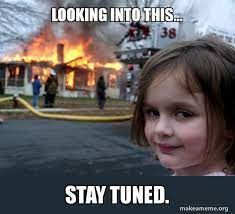